In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)
session = Session(engine)
# reflect the tables
Station = Base.classes.station
Measurement = Base.classes.measurement

In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
#Station = Base.classes.station
#Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
station = session.query(Base.classes.station).all()
station

In [9]:
# Create our session (link) from Python to the DB
measurement = session.query(Base.classes.measurement).all()
measurement

 ...]

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_str = recent_date[0]
#import matplotlib.dates as mdates
# Calculate the date one year from the last date in data set.

one_year_ago_dt = datetime.strptime(recent_date_str, '%Y-%m-%d') - timedelta(days=365)
print(f"The date one year ago from the most recent date is: {one_year_ago_dt}")
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago_dt).\
    order_by(Measurement.date).all()
print(precipitation_data)

The date one year ago from the most recent date is: 2016-08-23 00:00:00
[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 

<Figure size 600x400 with 0 Axes>

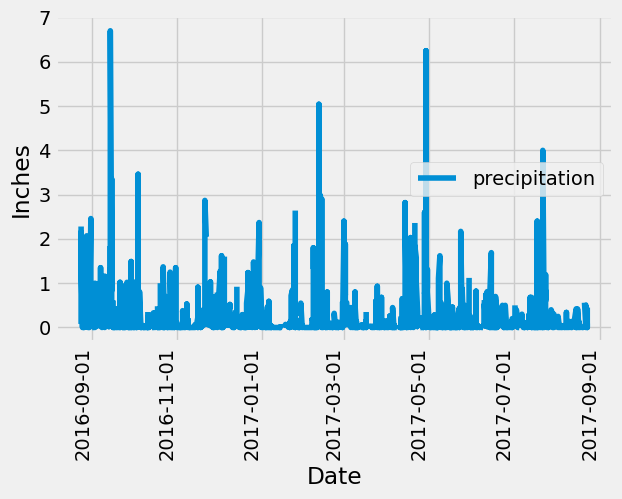

In [21]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
import matplotlib.dates as mdates
df_precipitation = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
# Sort the dataframe by date
df_precipitation['date'] = pd.to_datetime(df_precipitation['date'], errors='coerce')  # Ensure 'date' is in datetime format
df_precipitation.dropna(subset=['date'], inplace=True)
df_precipitation.sort_values('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(6, 4))
df_precipitation.plot(x='date', y='precipitation', kind='line')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.ylabel('Inches')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = df_precipitation['precipitation'].count()
mean = df_precipitation['precipitation'].mean()
std = df_precipitation['precipitation'].std()
min = df_precipitation['precipitation'].min()
quater = df_precipitation['precipitation'].quantile(0.25)
median = df_precipitation['precipitation'].median()
third_quarter = df_precipitation['precipitation'].quantile(0.75)
max = df_precipitation['precipitation'].max()
print ("\033[1m         precipation\033[0m")
print ("----------------------")
print("\033[1mcount\033[0m ", format(count, ".6f"))
print("\033[1mmean\033[0m     ", format(mean, ".6f"))
print("\033[1mstd\033[0m      ", format(std, ".6"))
print("\033[1mmin\033[0m      ", format(min, ".6f"))
print("\033[1m25%\033[0m      ", format(quater, ".6f"))
print("\033[1m50%\033[0m      ", format(median, ".6f"))
print("\033[1m75%\033[0m      ", format(third_quarter, ".6f"))
print("\033[1mMax\033[0m      ", format(max, ".6f"))

         precipation
----------------------
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
Max       6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Base.classes.station).all()
total_stations = len(stations)
total_stations

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(
    Base.classes.station.station,
    func.count(Base.classes.measurement.station)).join(Base.classes.measurement, Base.classes.station.station == Base.classes.measurement.station) \
 .group_by(Base.classes.station.station) \
 .order_by(func.count(Base.classes.measurement.station).desc()) \
 .all()
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(
    func.min(Measurement.tobs).label('lowest_temperature'),
    func.max(Measurement.tobs).label('highest_temperature'),
    func.avg(Measurement.tobs).label('average_temperature')
).filter(Measurement.station == 'USC00519281').all()

# Print the results
for result in results:
    print(f"Lowest Temperature: {result.lowest_temperature}")
    print(f"Highest Temperature: {result.highest_temperature}")
    print(f"Average Temperature: {result.average_temperature}")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


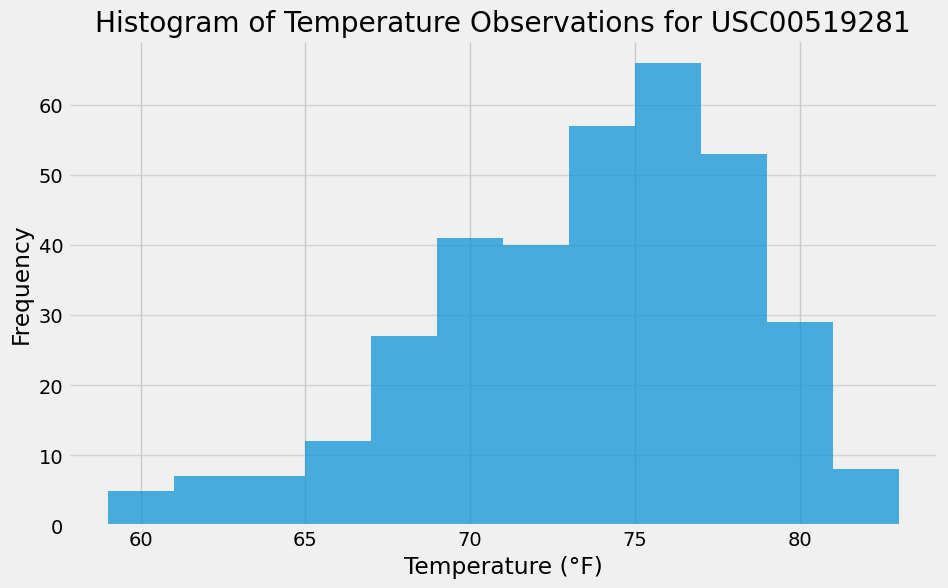

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """
SELECT tobs
FROM measurement
WHERE station = 'USC00519281'
AND date >= DATE('2017-08-23', '-12 months')
"""

# Load the query results into a DataFrame
tobs_df = pd.read_sql(query, engine)

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
tobs_df['tobs'].plot(kind='hist', bins=12, alpha=0.7)
plt.title('Histogram of Temperature Observations for USC00519281')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()